# <font color='blue' style='font-size: 45px;'>Algoritmos Não Supervisionados</font>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

### Importando bibliotecas

In [22]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## <font color='red'> Dataset</font>

### Fonte: https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Utilizar modelos de machine learning para algoritmos não supervisionados para agrupar os filmes por gêneros semelhantes. </p>

### Dados: 
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>FilmeID</b> -ID do filme</li>
    <li><b>Título</b>- Título do filme</li>
    <li><b>Gênero</b> - Gênero do filme</li>

In [24]:
url_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(url_filmes)

filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Renomeando as colunas do Dataset

In [0]:
filmes.columns = ['filme_Id', 'titulo', 'generos']

### Series

filmes.genero = retorna uma Series só com a coluna gêneros

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Extrair os dummies do Dataset

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Podemos utilizar o pandas para extrair os dummies das colunas. Com isso, cada gênero será representado como uma coluna binária, na qual 0 significa que não possui gênero e 1 que o possui.</p>

### Series.str.get_dummies

 - Split each string in the Series by sep and return a frame of dummy/indicator variables.

In [26]:
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Concatenando dois DataFrames


<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
  <li><font color='green'><b>generos = filmes.generos.str.get_dummies()</font></b> - isto retorna um Dataframe com os dummies dos gêneros.</li>
</font> </ul>

Podemos pegar este Dataframe e pedir para o pandas concatená-lo (concat) com o de filmes com as colunas (axis=1).

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Concat </b>- Concatenar as duas tabelas, as de filmes e as de gêneros;</li>
    <li><b>Axis (Eixo)</b>  - Colocar somente um eixo, ou seja, uma tabela ao lado da outra;</li>


In [27]:
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_Id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Reescalar os Dummies

Por fim, temos que reescalar os dummies para saber quais dos gêneros mais infuenciam os filmes. Portanto vamos importar o escalador da biblioteca sklearn e criar um objeto a partir da classe StandardScaler:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
  <li><font color='purple'><b>from sklearn.preprocessing import StandardScaler</li>
  <li>scaler = StandardScaler()</li></font></b></ul>

Vamos falar para o scaler aprender com os dummies e transformá-los <font color='purple'>**(fit_transform)**</font> para que, dessa forma, tenhamos mais informações sobre como os gêneros infuenciam o filme:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
  <li><font color='green'><b>generos_escalados = scaler.fit_transform(generos)</li></font></b></ul>

Podemos ver os novos gêneros reescalados colocando a variável como última instrução no bloco do documento do colaboratory: 

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
  <li><font color='green'><b>generos_escalados</li></font></b></ul>


In [28]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [29]:
generos_escalados.shape

(9742, 20)

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Machine Learning</font>
<hr style='border: 2px solid red;'>

## Clusterização - Começando com o K-Means

Para agrupar os gêneros vamos utilizar um módulo da biblioteca sklearn.cluster chamado K-Means.

O parâmetro a ser passado neste modelo é o número de clusters: 

 
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
  <li><font color='purple'><b>from sklearn.cluster import KMeans</li>
   <li>modelo = KMeans(n_clusters=3)</font></b></ul>
  <br>
  O número de cluster é o número de grupos que o K-Means irá utilizar para alocar os dados. Esse número é o quantidade de grupos que teremos ao final da execução do algoritmo.
  
  <br>
  
 Para entender o funcionamento do K-Means:  
 <li>https://www.naftaliharris.com/blog/visualizing-k-means-clustering/</li>
 <li>https://minerandodados.com.br/index.php/2017/12/12/entenda-o-algoritmo-k-means/</li>
<br>

 Outras formas de agrupar os dados e outros métodos de setar os centroides:
  
  <li> Método aleatório (Randomly)</li>
  <li> Método Farthest Point</li>     


### Agrupando em 20 grupos

In [30]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

print('Grupos {}'.format(modelo.labels_))

Grupos [11 10  9 ...  3 17  1]


In [31]:
print(modelo.cluster_centers_)

[[-5.91799474e-02  2.07069709e+00  6.49012950e-01 -2.58679155e-01
  -2.70451223e-01 -4.87153855e-01  7.01441936e-01 -2.17489438e-01
  -2.87503910e-01 -2.87609045e-01 -9.49256298e-02 -3.21056875e-01
  -1.28397078e-01 -1.88418950e-01 -2.49986367e-01 -3.21261783e-01
  -3.34434762e-01  1.25581761e+00 -2.02019716e-01 -1.32065337e-01]
 [-5.91799474e-02 -3.11603234e-01 -2.88686901e-01 -2.58679155e-01
  -2.70451223e-01  1.26242494e+00 -3.74631584e-01 -2.17489438e-01
  -2.98605527e-01 -2.94809878e-01 -9.49256298e-02 -3.34055205e-01
  -1.28397078e-01 -1.88418950e-01 -2.49986367e-01 -4.42633460e-01
  -3.34434762e-01 -4.44315653e-01 -2.02019716e-01 -1.32065337e-01]
 [-5.91799474e-02  1.02120483e+00  6.42241170e-01 -2.58679155e-01
  -2.70451223e-01 -4.29073073e-01 -2.89059517e-01 -2.17489438e-01
  -4.84305972e-01 -2.80003346e-01 -9.49256298e-02 -6.64346284e-03
  -1.28397078e-01 -1.88418950e-01 -2.41451820e-01 -3.61252765e-01
   2.99011978e+00  3.66244733e-01 -2.02019716e-01 -1.32065337e-01]
 [-5.91

In [32]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,2.070697,0.649013,-0.258679,-0.270451,-0.487154,0.701442,-0.217489,-0.287504,-0.287609,-0.094926,-0.321057,-0.128397,-0.188419,-0.249986,-0.321262,-0.334435,1.255818,-0.202020,-0.132065
1,-0.059180,-0.311603,-0.288687,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.298606,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.444316,-0.202020,-0.132065
2,-0.059180,1.021205,0.642241,-0.258679,-0.270451,-0.429073,-0.289060,-0.217489,-0.484306,-0.280003,-0.094926,-0.006643,-0.128397,-0.188419,-0.241452,-0.361253,2.990120,0.366245,-0.202020,-0.132065
3,-0.059180,-0.369557,-0.254795,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.975799,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.028299,-0.202020,-0.132065
4,-0.059180,0.407119,0.036916,-0.211810,-0.259179,-0.465266,-0.305452,-0.190129,0.750874,-0.252914,-0.094926,-0.305695,-0.128397,-0.188419,-0.225837,-0.051174,-0.239987,-0.204117,4.950012,-0.132065
5,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
6,-0.059180,-0.462136,-0.364480,-0.238850,-0.260913,-0.604451,-0.338046,4.597924,-0.808396,-0.285947,-0.094926,-0.318057,-0.128397,-0.188419,-0.229553,-0.429644,-0.334435,-0.479111,-0.078173,-0.132065
7,-0.059180,0.013991,-0.303825,-0.258679,-0.243086,-0.381216,2.669289,-0.217489,0.195431,-0.269383,-0.094926,-0.012772,-0.128397,-0.188419,4.000218,-0.163133,-0.265651,1.286246,-0.166488,-0.132065
8,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513
9,-0.059180,-0.407361,-0.260911,-0.258679,-0.270451,0.469247,-0.374632,-0.217489,0.320044,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.277986,-0.437064,-0.202020,-0.132065


### Visualizando os clusters em um gráfico

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b696c6f28>,
      dtype=object)

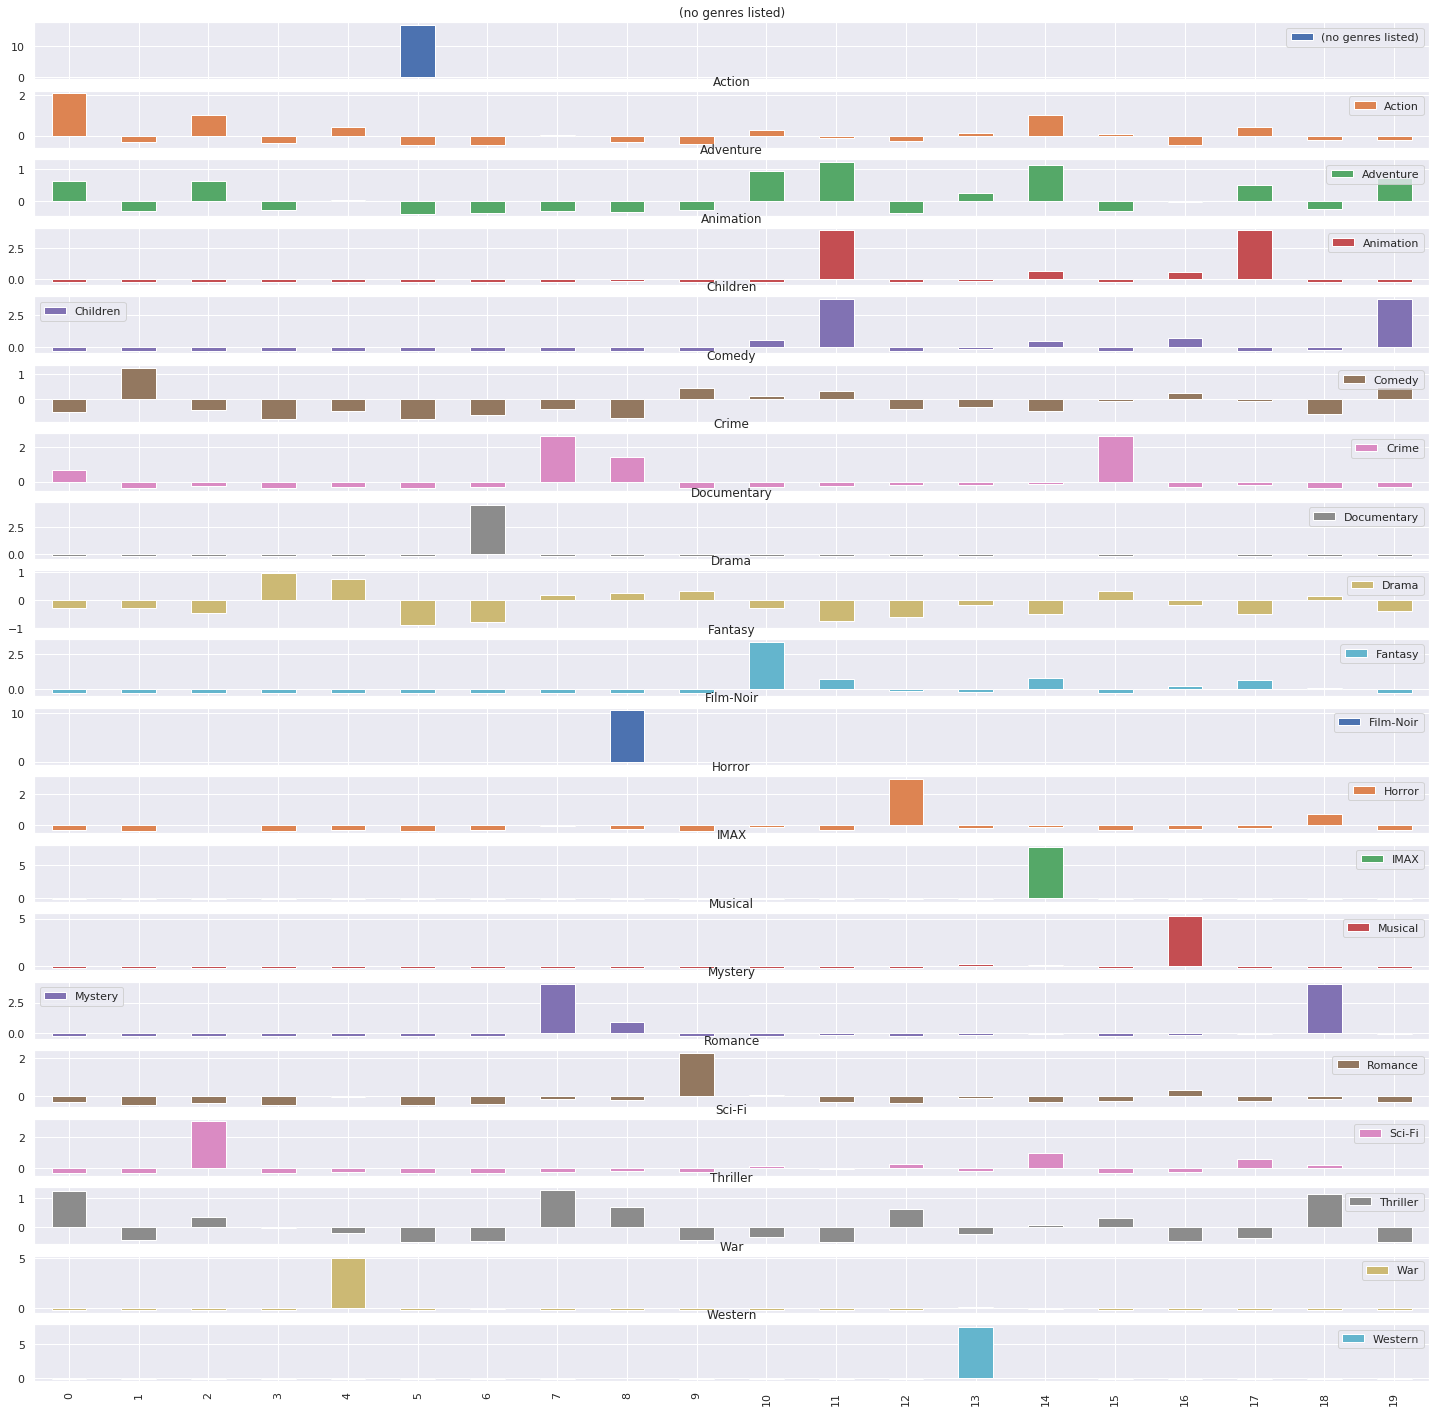

In [33]:
grupos.plot.bar(subplots=True, figsize = (25, 25))

### Visualizando cada centroide em um gráfico

Vamos rotacionar (rot) os rótulos do eixo x para ficar mais legível (na vertical)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b68d04c50>,
      dtype=object)

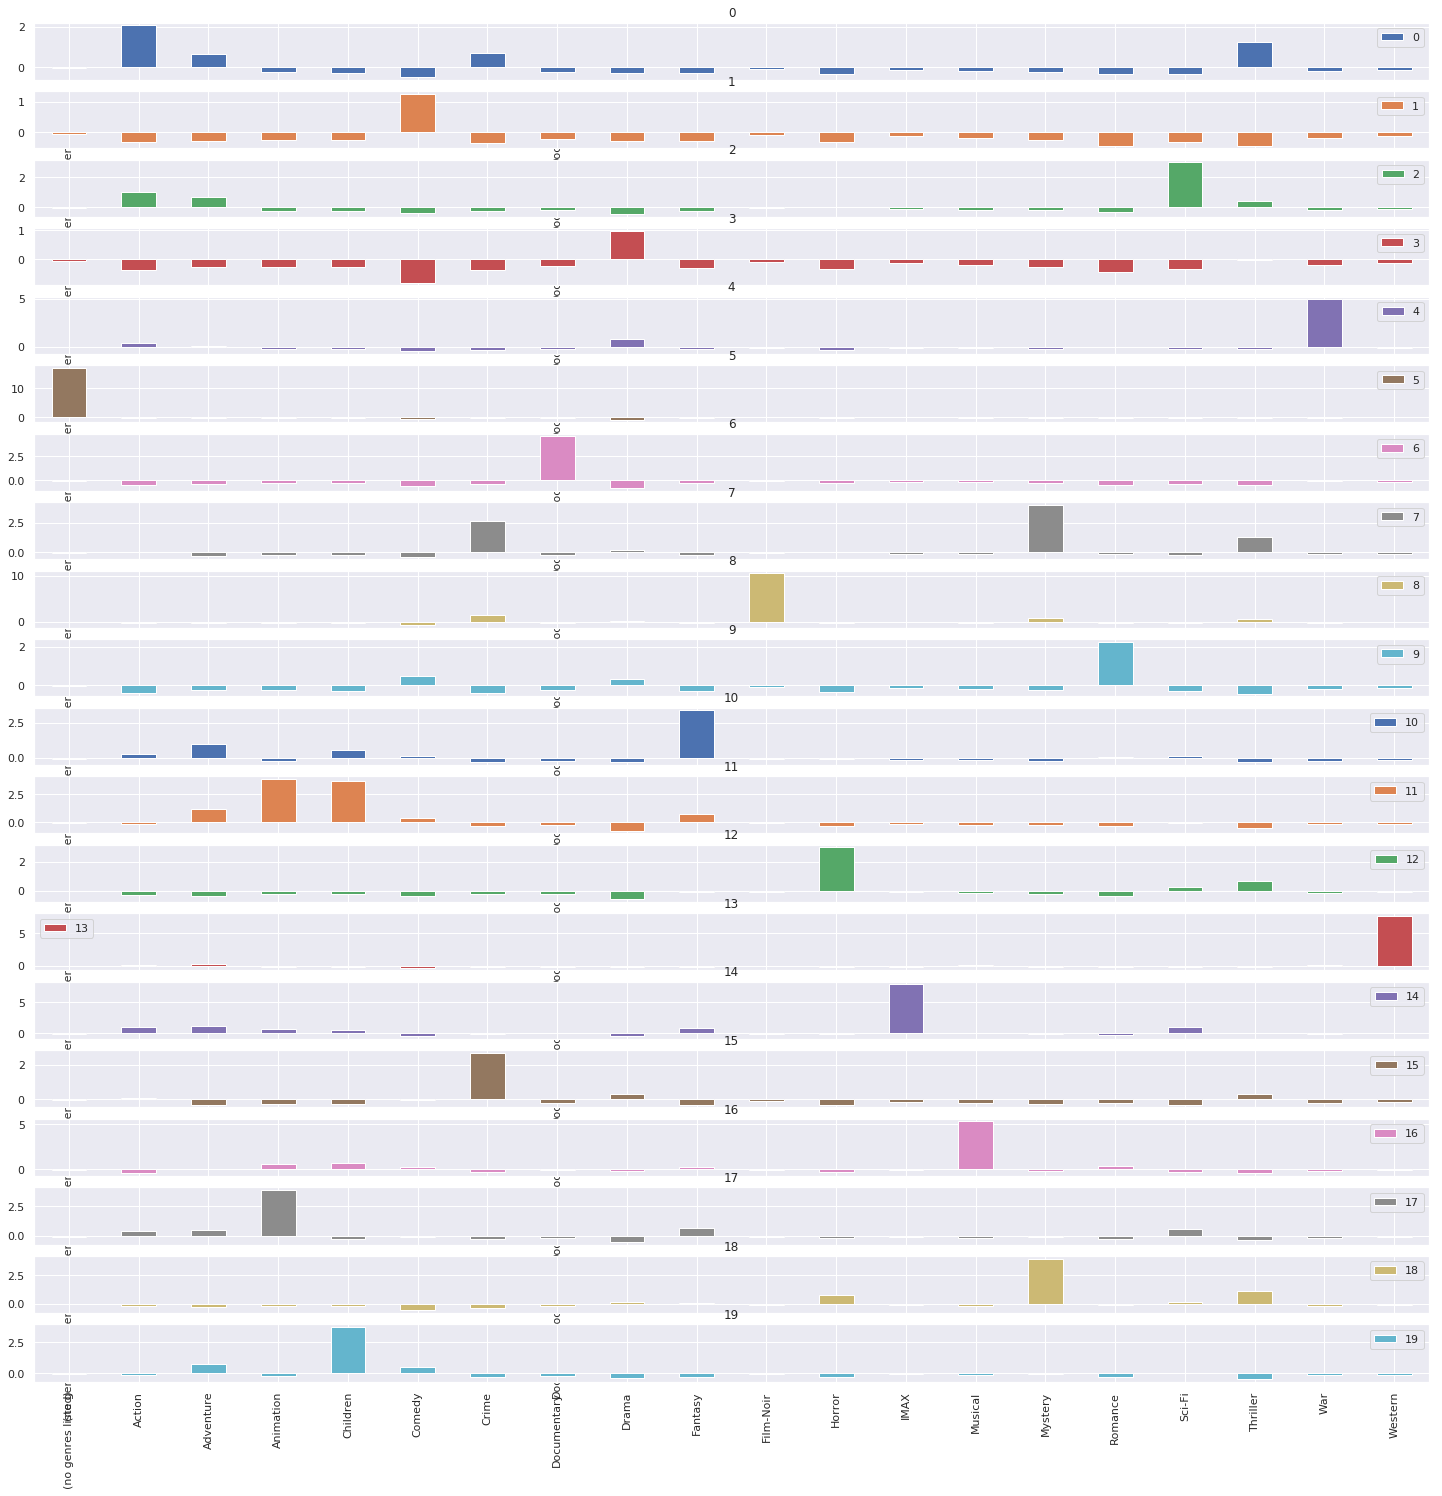

In [34]:
grupos.transpose().plot.bar(subplots=True, figsize = (25, 25), sharex=False)


### Verificando a consistência dos clusters - filtragem

In [35]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_Id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7657,88515,Blitz (2011),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7794,92008,Haywire (2011),Action|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6543,54736,"Kingdom, The (2007)",Action|Drama|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3726,5156,"Big Doll House, The (1971)",Action,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8156,102338,Shaolin Temple (Shao Lin si) (1976),Action|Adventure|Drama,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5343,8908,Ladder 49 (2004),Action|Drama|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3676,5064,The Count of Monte Cristo (2002),Action|Adventure|Drama|Thriller,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8056,98961,Zero Dark Thirty (2012),Action|Drama|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9471,168456,Mercury Plains (2016),Action|Adventure|Drama,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8636,119145,Kingsman: The Secret Service (2015),Action|Adventure|Comedy|Crime,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## TSNE - Reduzindo as dimensões

Vamos plotar um gráfico de pontos. Porém, temos 20 gêneros, ou seja, 20 dimensões. Logo, antes de plotar o gráfico, temos que reduzir as dimensões. Para isso, vamos utilizar o algoritmo TNSE do módulo manifold da sklearn.

<li><font color='purple'><b> from sklearn.manifold import TSNE</li></b></font>

A partir desse algoritmo podemos criar um objeto TSNE e utilizar o método <font color='purple'><b>fit_transform</b></font>. Este método nos retorna um array do numpy com as features reduzidas.

In [36]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-54.1419  ,  41.79703 ],
       [-45.69629 , -25.400955],
       [ 19.96348 , -36.65138 ],
       ...,
       [-12.919285,  12.468602],
       [-59.690742,  25.756018],
       [ 20.944868,  -8.967124]], dtype=float32)

### Scatterplot - Gráfico de Dispersão [Seaborn]

<font color='green'>x = visualizacao  [ : , 0 ] </font>
      <li> <b>  : </b> - todas as linhas</li>
       <li> <b> 0 </b> - a primeira coluna</li>
       <li> <b> hue </b> - cor baseado nos clusters</li>

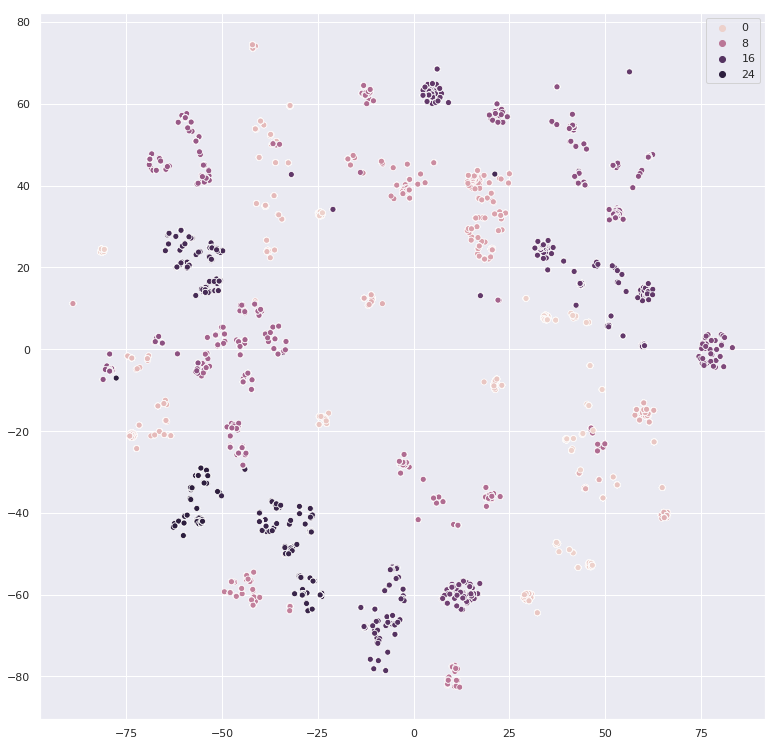

In [38]:
sns.set(rc={'figure.figsize': (13, 13)})
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1],
               hue=modelo.labels_)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b67c431d0>,
      dtype=object)

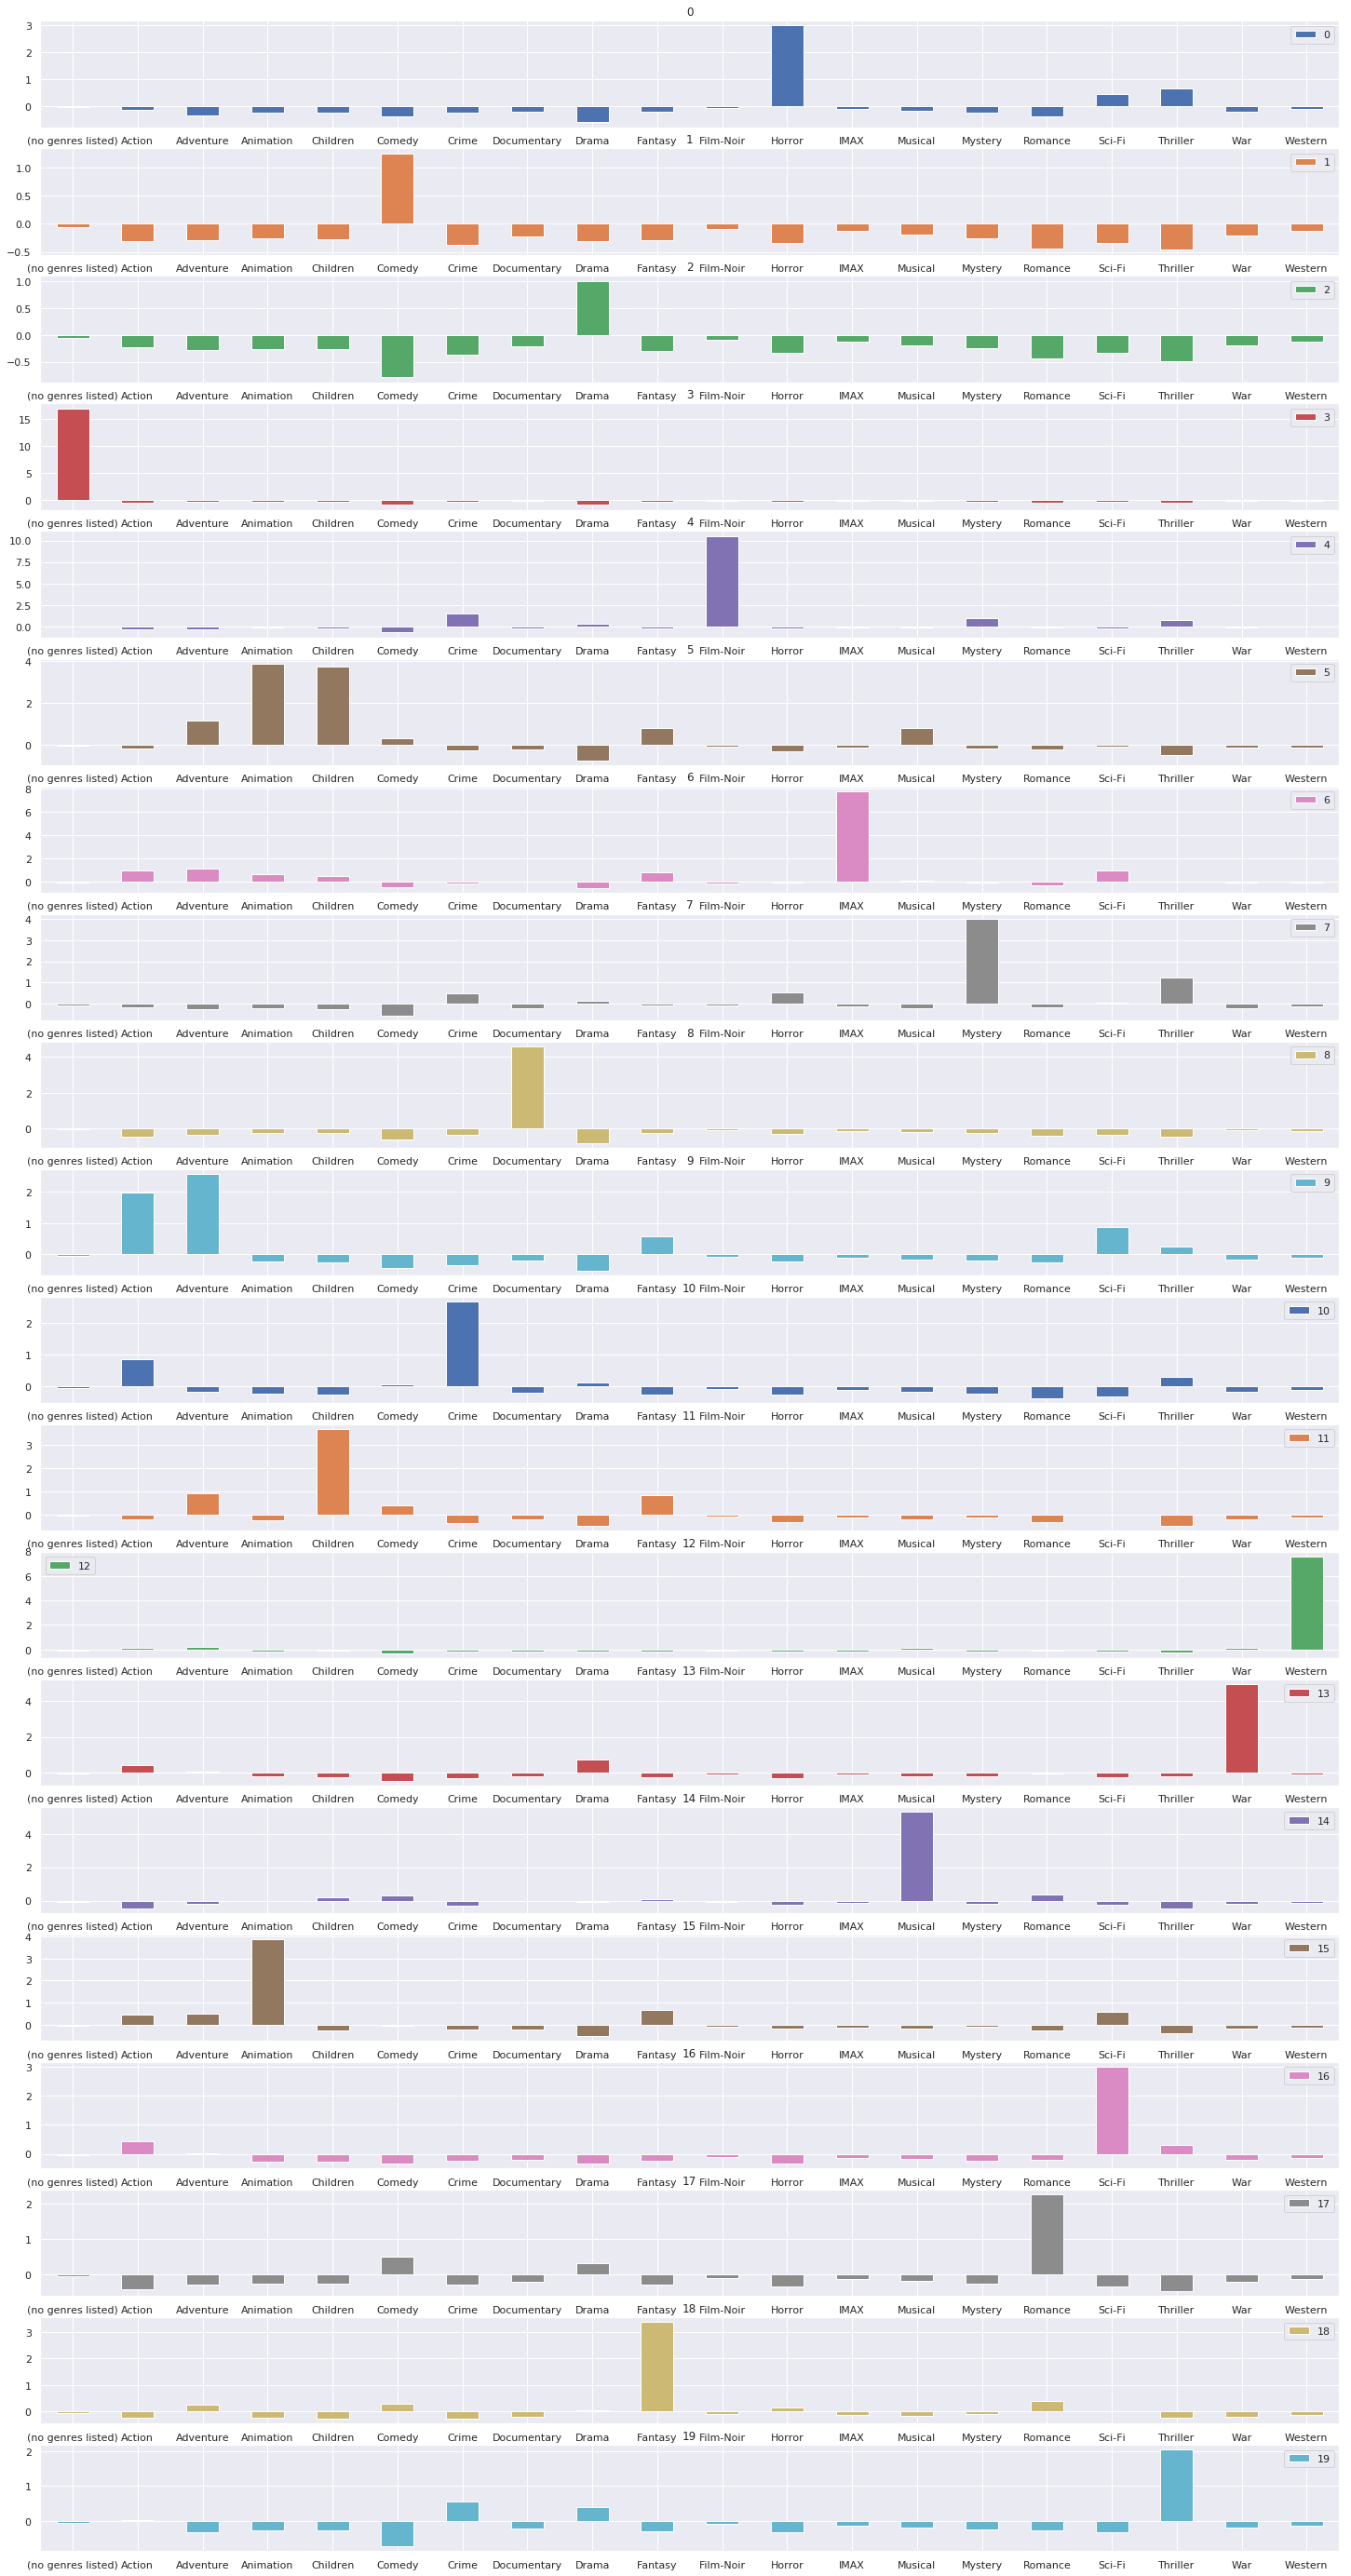

In [39]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
              columns=generos.columns)

grupos.head()

grupos.transpose().plot.bar(subplots=True,
                      figsize=(25, 50),
                      sharex=False,
                      rot=0)

### Verificando a consistência dos clusters novamente - filtragem

In [40]:
grupo = 10

filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_Id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3920,5507,xXx (2002),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5776,31420,Assault on Precinct 13 (2005),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
9461,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5168,8370,"Blind Swordsman: Zatoichi, The (Zatôichi) (2003)",Action|Comedy|Crime|Drama,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2943,3947,Get Carter (1971),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
7472,82053,Casino Jack (2010),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7226,73344,"Prophet, A (Un Prophète) (2009)",Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2489,3323,Chain of Fools (2000),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3235,4371,Baby Boy (2001),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
8188,103137,"Bling Ring, The (2013)",Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


### Função inertia_

Vamos criar a função que recebe o número de clusters e os dados e retorna o número de clusters e o erro ( inertia_ ) daquele modelo:

In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [42]:
kmeans(20, generos_escalados)

[20, 55208.626815454416]

In [43]:
kmeans(3, generos_escalados)

[3, 166085.37682628233]

### Compressão de lista

Vamos rodar essa função começando a agrupar em um único grupo e ir agrupando até 40 grupos. Para isso, vamos usar uma compressão de lista do Python:

In [44]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179664.9990790031],
 [3, 167771.71421711342],
 [4, 158021.52165428275],
 [5, 147056.15056991624],
 [6, 138476.42260137454],
 [7, 128901.11524264858],
 [8, 120259.02973199423],
 [9, 110472.99502806175],
 [10, 102895.34063935908],
 [11, 93273.54247615187],
 [12, 86859.82202245349],
 [13, 80502.49173357818],
 [14, 73422.9504735174],
 [15, 66840.79545908645],
 [16, 63656.9335315772],
 [17, 61215.14623785253],
 [18, 58820.23712895969],
 [19, 56718.88248519355],
 [20, 55021.86029864102],
 [21, 54809.495278622424],
 [22, 53361.92390495847],
 [23, 49841.46799034842],
 [24, 50181.118782578356],
 [25, 48091.838991607445],
 [26, 46639.01909602311],
 [27, 45434.93918777931],
 [28, 44204.86715867028],
 [29, 43306.93460534268],
 [30, 42813.6074144484],
 [31, 42062.43541989671],
 [32, 41340.01353186166],
 [33, 40639.75604472291],
 [34, 39162.06039486125],
 [35, 38545.93858022762],
 [36, 38624.91469821281],
 [37, 37342.70688175219],
 [38, 37270.39488351826],
 [39, 35751.3749137605

In [45]:
resultado = pd.DataFrame(resultado,
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179664.999079
2,3,167771.714217
3,4,158021.521654
4,5,147056.150570
5,6,138476.422601
6,7,128901.115243
7,8,120259.029732
8,9,110472.995028
9,10,102895.340639


### Plotando gráfico da coluna inertia

Lembrando que devemos passar a coluna grupos como parâmetros dos rótulos do eixo x

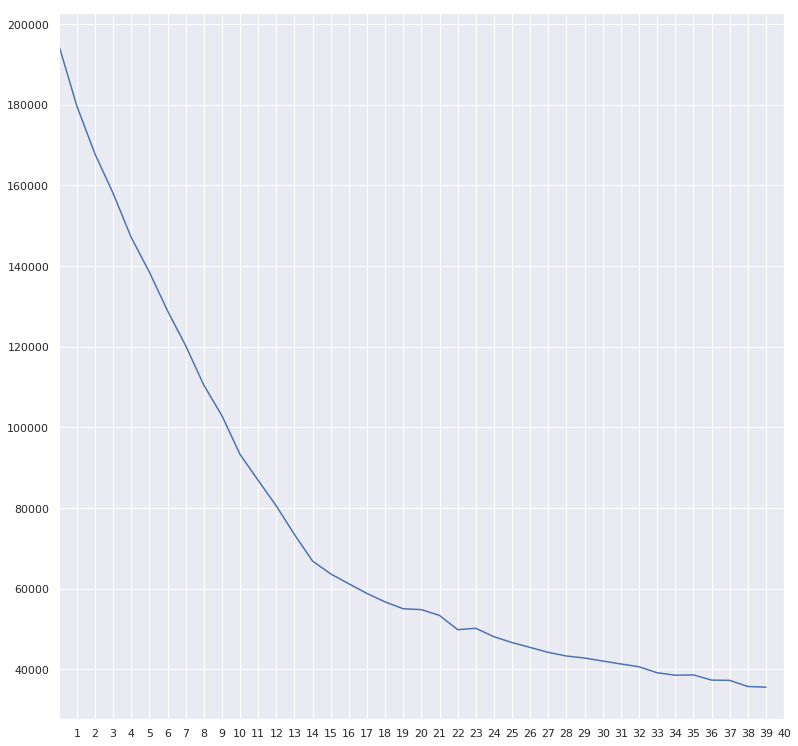

In [46]:
resultado.inertia.plot(xticks=resultado.grupos)

## Elbow method

Podemos ver que o ponto de quebra no gráfico foi próximo ao número 17, logo esse é o número de clusters que otimiza nosso modelo.

Podemos rodar um novo modelo com 17 grupos e mostrar seus centroides:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b66eedef0>,
      dtype=object)

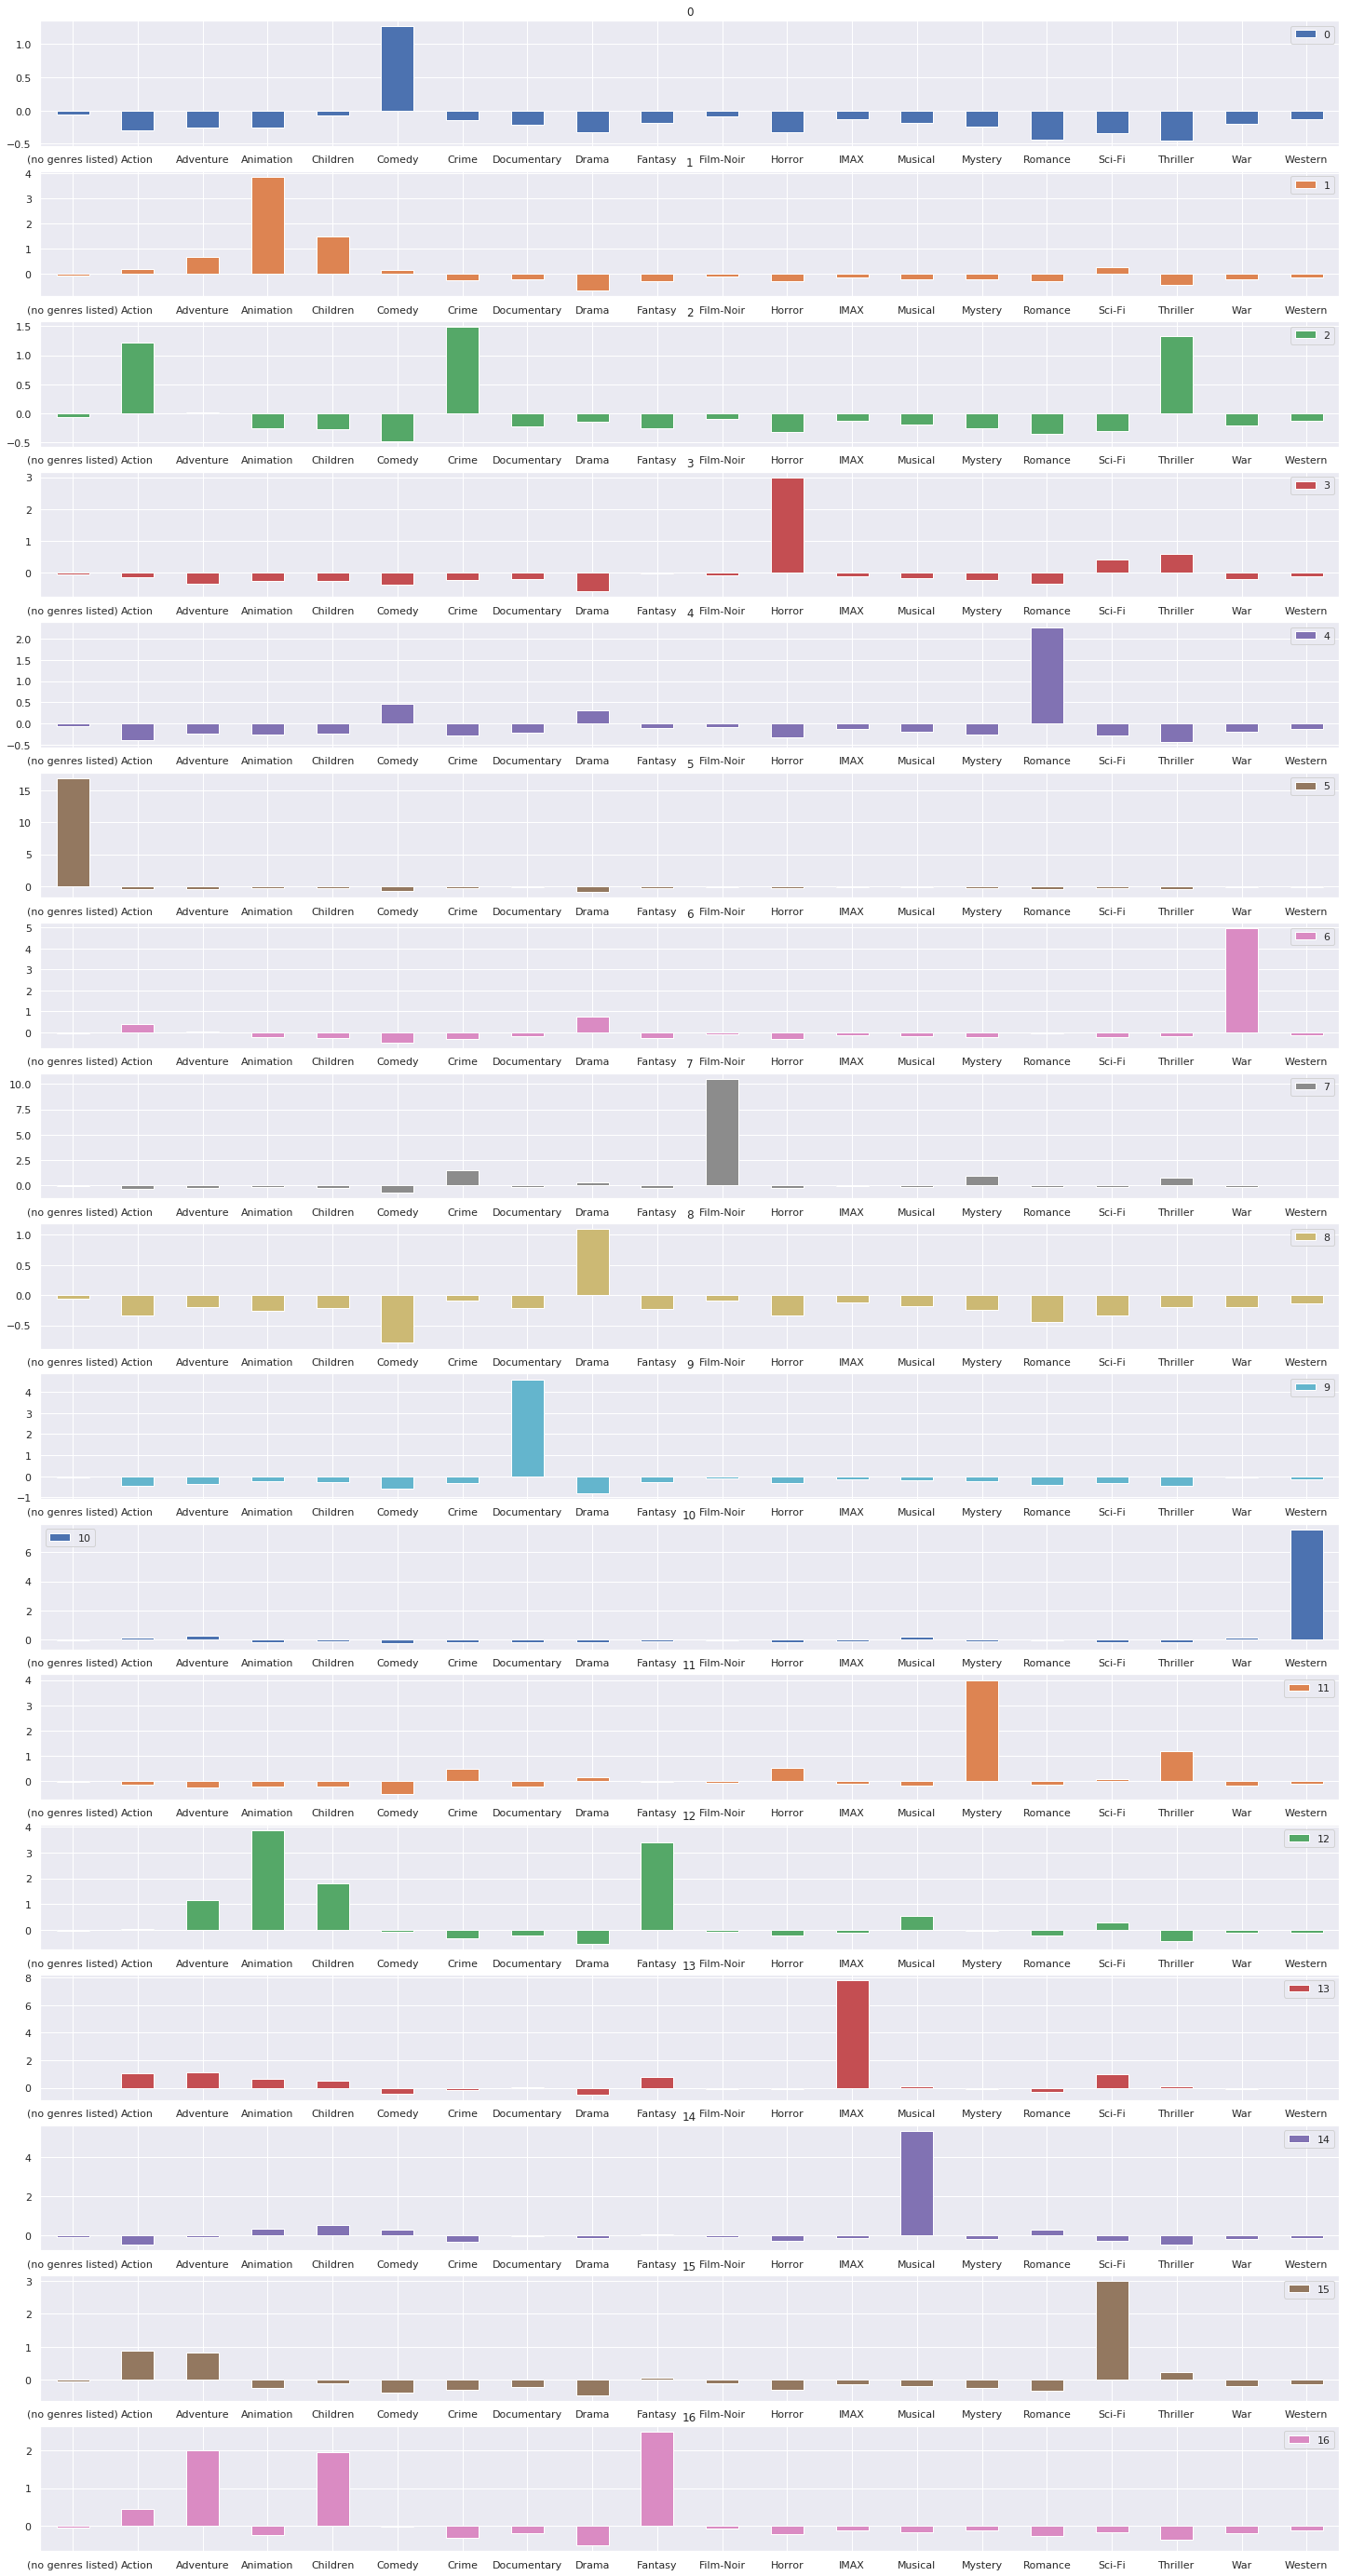

In [47]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                           figsize=(25, 50),
                           sharex=False,
                           rot=0)

In [48]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_Id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
977,1278,Young Frankenstein (1974),Comedy|Fantasy,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8816,131013,Get Hard (2015),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
405,467,Live Nude Girls (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6578,55241,Mr. Woodcock (2007),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3333,4516,Johnny Be Good (1988),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6837,61348,Disaster Movie (2008),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6749,59429,American Pie Presents Beta House (American Pie...,Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4882,7315,Against the Ropes (2004),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7231,73501,Pekka ja Pätkä Suezilla (1958),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9037,141513,Fort Tilden (2014),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
grupo = 6

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_Id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5985,36529,Lord of War (2005),Action|Crime|Drama|Thriller|War,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0
3211,4337,"Sand Pebbles, The (1966)",Drama|Romance|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2369,3143,Hell in the Pacific (1968),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5072,7980,"Bridge Too Far, A (1977)",Action|Drama|War,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
7333,77866,Robin Hood (2010),Action|Adventure|Drama|Romance|War,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
5867,32892,Ivan's Childhood (a.k.a. My Name is Ivan) (Iva...,Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3793,5304,"Rome, Open City (a.k.a. Open City) (Roma, citt...",Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3064,4111,Gardens of Stone (1987),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6720,58876,Stop-Loss (2008),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4674,6982,Forbidden Games (Jeux interdits) (1952),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## Agrupamento hierárquico

Para saber mais sobre agrupamento hierárquico: https://www.saedsayad.com/clustering_hierarchical.htm

### Algoritmo de hierarquização

Vamos começar importando o algoritmo AgglomerativeClustering da biblioteca sklearn:

<li><b><font color='purple'>from sklearn.cluster import AgglomerativeClustering</b></li></font>

Vamos criar um modelo e, seguindo o K-Means, vamos falar que queremos agrupar em 17 grupos.
Modelo criado, basta falar para ele aprender e retornar os grupos <font color='purple'><b>(fit_predict)</font></b>:

In [50]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos 

array([ 5, 14, 13, ...,  2,  5,  3])

In [51]:
tsne = TSNE()
visualizacacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-54.1419  ,  41.79703 ],
       [-45.69629 , -25.400955],
       [ 19.96348 , -36.65138 ],
       ...,
       [-12.919285,  12.468602],
       [-59.690742,  25.756018],
       [ 20.944868,  -8.967124]], dtype=float32)

### Scatterplot - Gráfico de Dispersão [Seaborn]

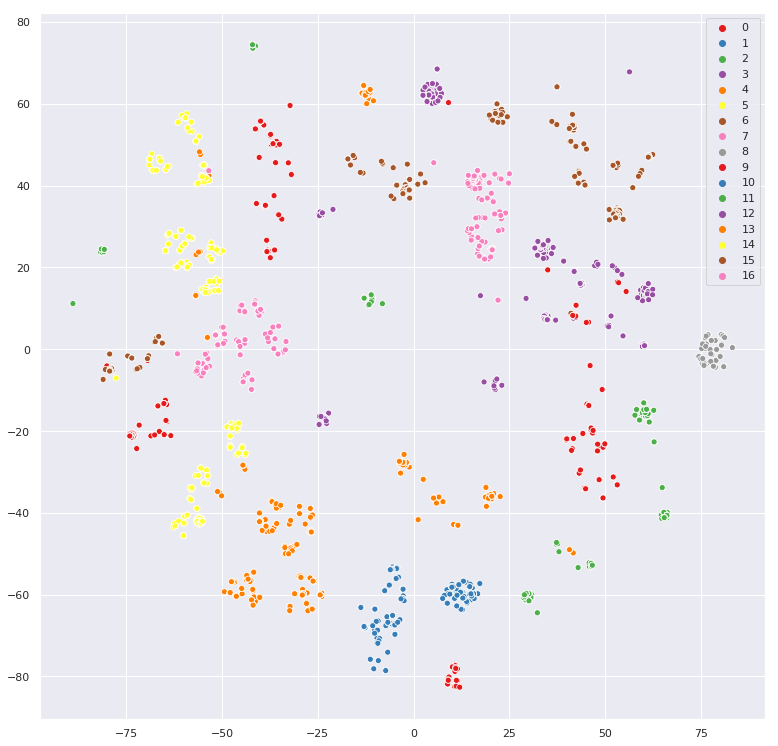

In [52]:
sns.scatterplot(x=visualizacao[:,0],
               y=visualizacao[:,1],
               hue=grupos,
               palette=sns.color_palette('Set1', 17))

## Dendograma

Para plotar o dendrograma, precisamos da matriz de distâncias dos dados e da função que plota o dendrograma propriamente dito. Vamos importá-las da biblioteca scipy:

<b><li><font color='purple'>from scipy.cluster.hierarchy import dendrogram, linkage</b></li></font>

Antes de plotar o dendrograma, vamos agrupar novamente os dados com o K-Means para ter uma visualização dos centróides mais próxima a célula do dendrograma (e para sobrescrever as variáveis que usamos com o mesmo nome):

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b6637ff98>,
      dtype=object)

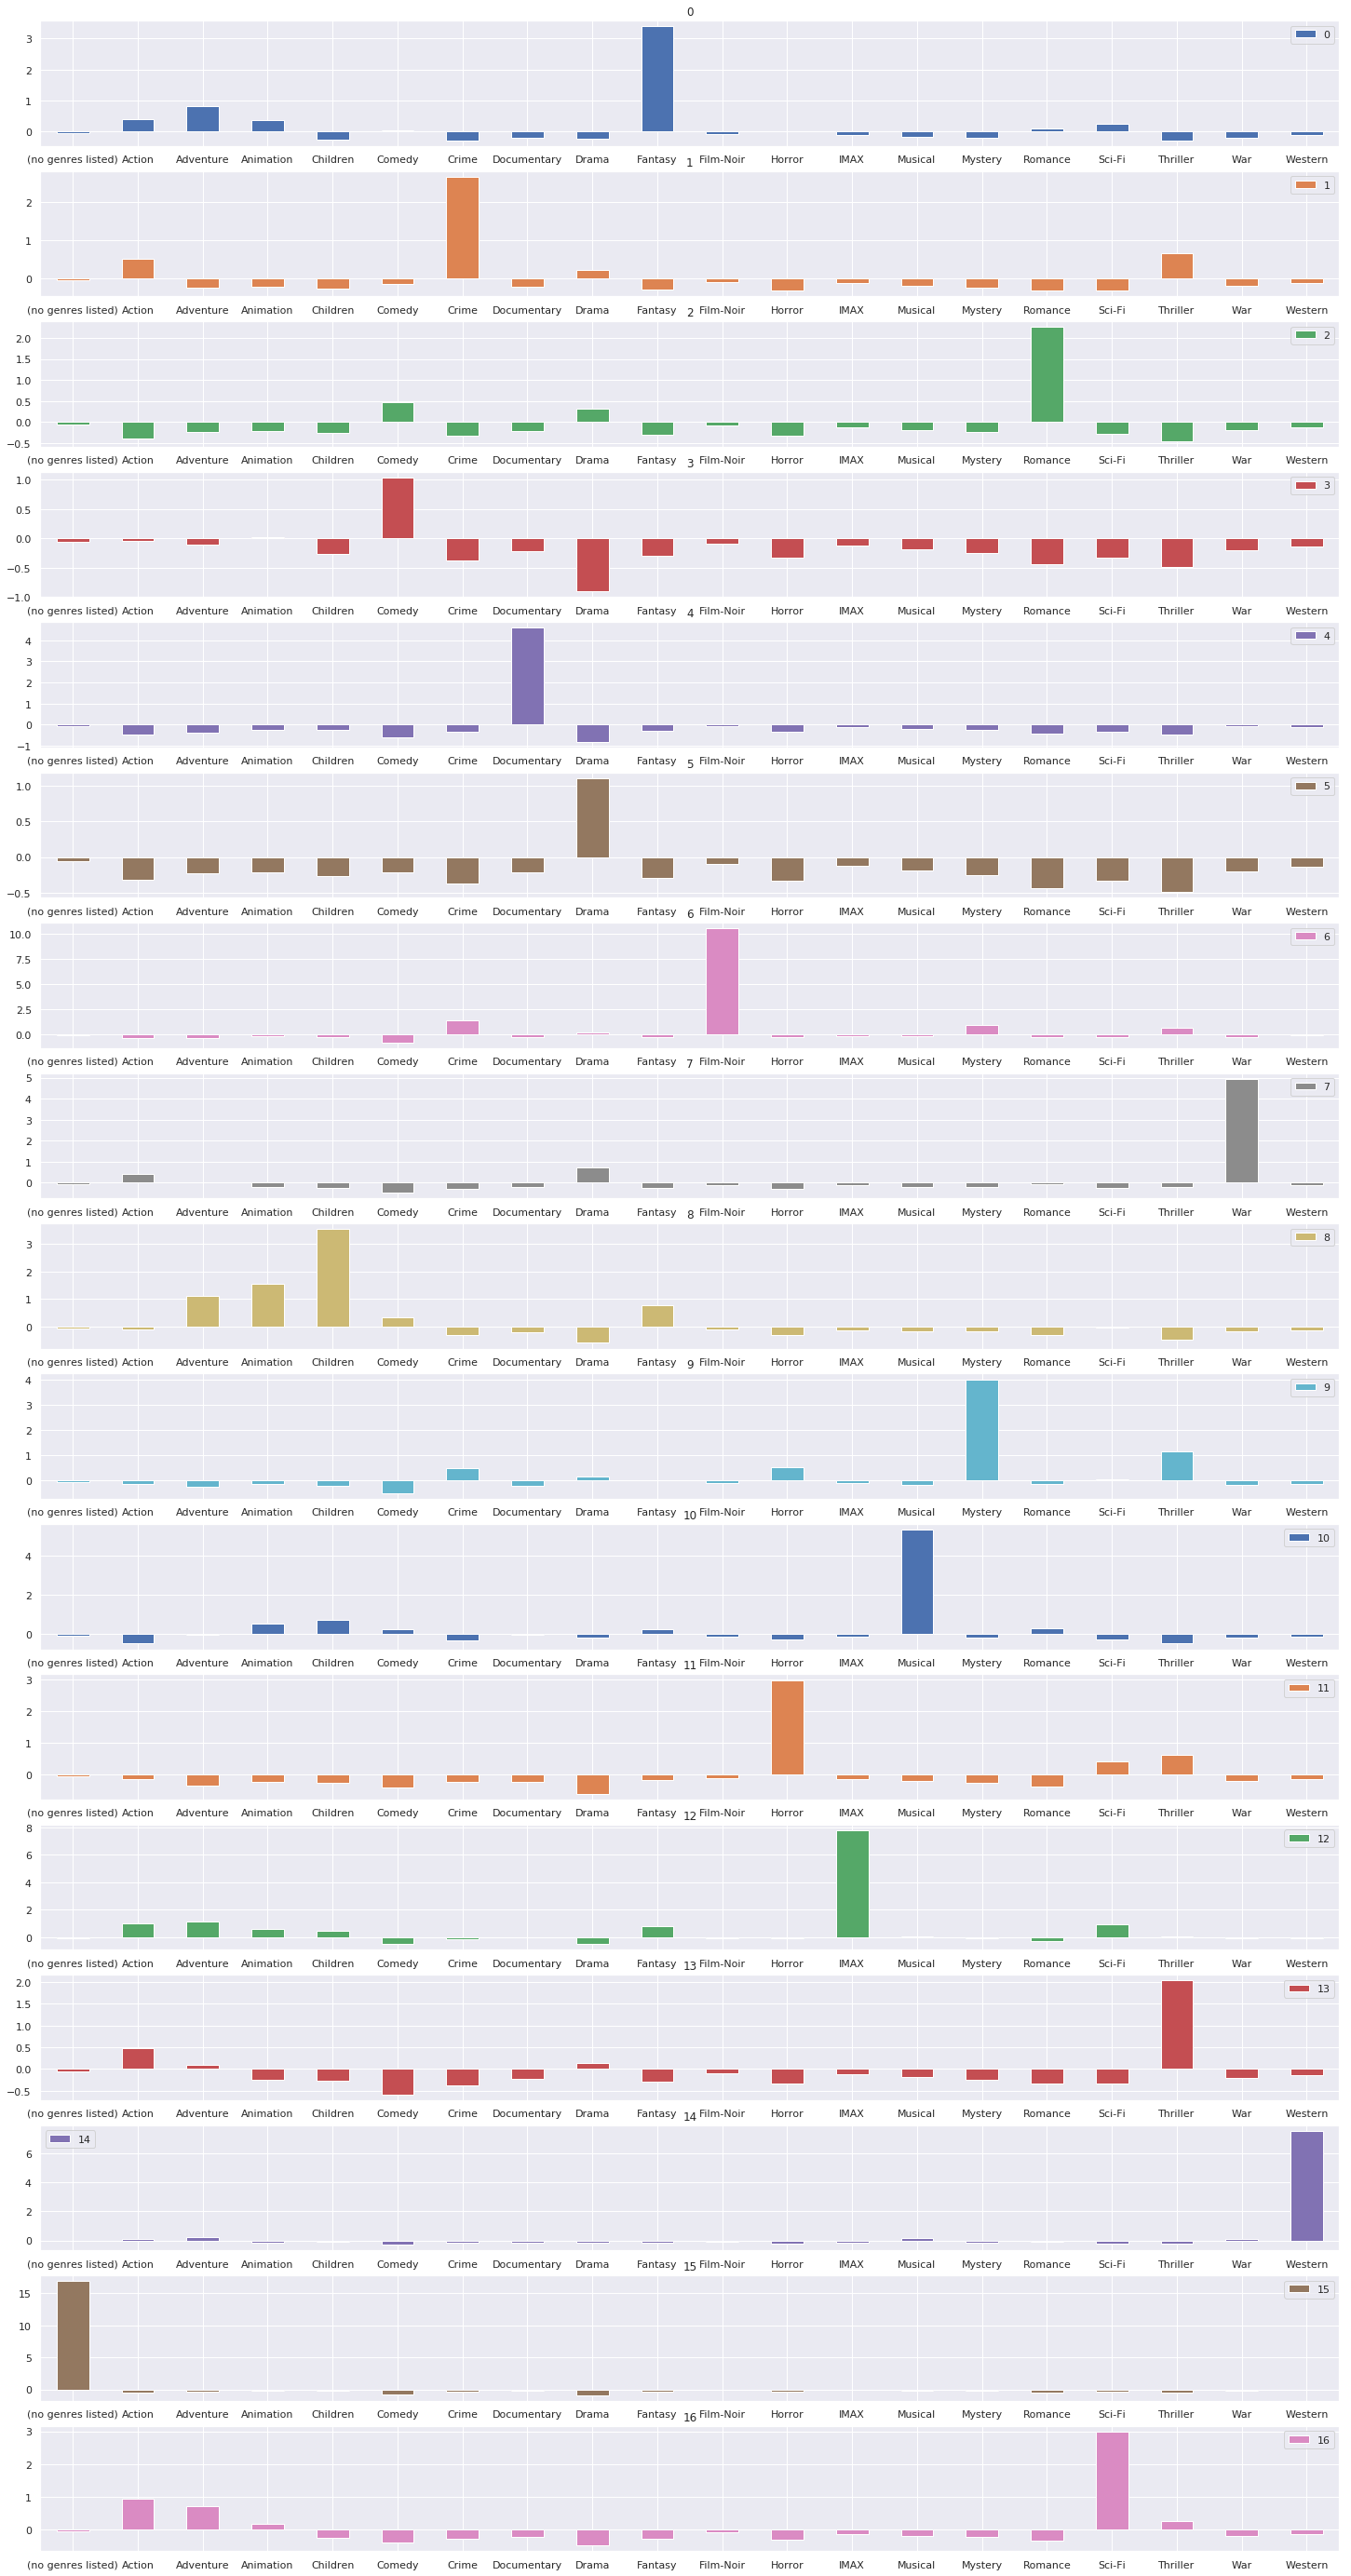

In [53]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos=pd.DataFrame(modelo.cluster_centers_,
                   columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                           figsize=(25, 50),
                           sharex=False,
                           rot=0)

### Linkage = matriz de distância

In [54]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 3.        ,  5.        ,  2.40213336,  2.        ],
       [13.        , 17.        ,  2.86931148,  3.        ],
       [ 2.        , 18.        ,  2.90324608,  4.        ],
       [ 1.        , 19.        ,  3.38257364,  5.        ],
       [11.        , 20.        ,  3.84937396,  6.        ],
       [16.        , 21.        ,  3.92298442,  7.        ],
       [ 0.        , 22.        ,  4.12801086,  8.        ],
       [ 8.        , 23.        ,  4.50609632,  9.        ],
       [ 9.        , 24.        ,  4.59596787, 10.        ],
       [ 4.        , 25.        ,  5.12018974, 11.        ],
       [ 7.        , 26.        ,  5.25287105, 12.        ],
       [10.        , 27.        ,  5.81011918, 13.        ],
       [14.        , 28.        ,  7.87321954, 14.        ],
       [12.        , 29.        ,  8.31839182, 15.        ],
       [ 6.        , 30.        , 10.81567055, 16.        ],
       [15.        , 31.        , 17.06529323, 17.        ]])

### Plotando o Dendrograma

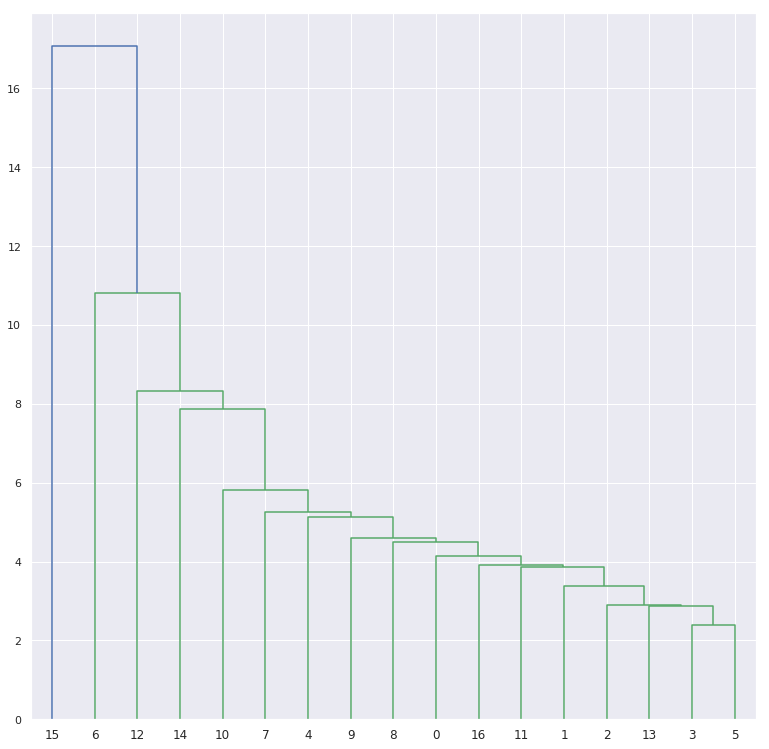

In [55]:
dendrograma = dendrogram(matriz_de_distancia)

# <font color='red' style='font-size: 30px;'>Extras</font>
<hr style='border: 2px solid red;'>

## Visualizando os centroides

Vimos que o K-Means utiliza o conceito de centróides para agrupar os dados. Mas como podemos visualizá-los em um gráfico?

<br>
Vamos pedir para a biblioteca sklearn gerar alguns dados em duas dimensões para conseguirmos visualizar seus centróides.

<br>
Para criar os dados, vamos utilizar a função make_blobs da biblioteca sklearn no módulo dos datasets . Essa função gera dados em formas de "bolhas", isto é, os dados são gerados em forma de grupos:

<br>
A função make_blobs nos retorna os xn... e o valor de y, isto é, as variáveis independentes e a variável dependente.


In [0]:
from sklearn.datasets import make_blobs

Como queremos os dados em duas dimensões, falamos que o número de features ( n_features ) deve ser igual a 2 com 1000 exemplos ( n_samples ) de testes e para termos os mesmos dados, vamos setar o parâmetro de aleatoriedade como 7 ( random_state ):

In [0]:
dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)

Como o make_blobs nos retorna um par de dados (x, y) e não queremos o y , usamos o underscore (_) para ignorar o retorno dessa variável. Vamos transformar estes dados em um DataFrame do pandas e renomear as colunas para coluna1 e coluna2 .

In [0]:
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

Em seguida, cruzamos os dados das colunas e plotamos a distribuição.

In [0]:
import matplotlib.pyplot as plt 
plt.scatter(x=dados.coluna1, y=dados.coluna2)

In [0]:
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)

Plotamos os dados seguimentados identificando os grupos com cores distintas (c = grupos) e vívidas (cmap = 'viridis')

In [0]:
plt.scatter(x=dados.coluna1, y=dados.coluna2,
c=grupos,
cmap='viridis')

Geramos pontos centrais para os grupos, chamados centroides , e plotamos novamente nossos grupos.

In [0]:
centroides = modelo.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
c=grupos,
cmap='viridis')

O pandas nos devolve os centroides em forma de matriz, então montamos a localização cartesiana pegando a posição 0 para o eixo x (centroides[:,0]) e a posição 1 para o eixo y (centroides[:,1]) . Também podemos estilizar a representação do nosso centroide , marcando como um X ( marker='X'), setando o tamanho (s=169), a largura da linha (linewidths=5), cor (color=g) e a hierarquia de aparição (zorder=8).

Com isso, temos nossos dados plotados em 3 grupos de cores distintas com centroides bem localizados.

In [0]:
plt.scatter(centroides[:, 0], centroides[:, 1],
marker='X', s=169, linewidths=5,
color='g', zorder=8)

## K-Means - Erro Médio e Erro Médio Quadrado

Vimos que o K-Means utiliza o erro para ver a qualidade do modelo. Este erro é a distância do centróide para cada dado pertencente ao grupo. 

Mas como essa distância é calculada de fato? 

### Erro Médio

O K-Means utiliza a seguinte função de erro. Vamos dizer que a distância de um ponto de um grupo para o centróide vale 2. Quando somamos a distância de todos os pontos, chamamos de erro médio absoluto, ou mean absolute erro (MAE) - https://en.wikipedia.org/wiki/Mean_absolute_error


### Erro Médio Quadrado 

Porém, queremos penalizar os pontos mais distantes do centróide - pois, um ponto muito distante do centróide pode não pertencer àquele grupo. Uma maneira efetiva de penalizar esses dados é elevando suas distâncias ao quadrado. Isto é, aquela distancia de valor 2, quando elevada ao quadrado, vale 4. Portanto, o erro é maior do que antes.

Esse método é chamado de erro médio quadrado, ou mean squarred error (MSE) - https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio

### Discussão sobre os dois tipos de erro no Stack Exchange
https://stats.stackexchange.com/questions/48267/mean-absolute-error-or-root-mean-squared-error 
 

## Agrupamento por densidade

Vimos duas formas de agrupamento, o particionado e o hierárquico. Porém, existem outra forma de agrupar os dados. 
<br>

Em todos os exemplos precisamos passar o número de clusters, mas o que acontece quando não temos esse número? O agrupamento por densidade tenta resolver isso. Nele, não passamos o número de clusters e ele tentará agrupar os dados pela densidade dos pontos.
<br>
Para isso, vamos importar a classe DBSCAN do módulo de cluster
<font color='purple'><b><li>from sklearn.cluster import DBSCAN</li></b></font>
  <br>
 Vamos criar o modelo e falar para ele agrupar os dados:
 <br>
 
  <font color='green'>
    <li>modelo = DBSCAN()</li>
    <li>grupos = modelo.fit_predict(dados)</li></font>
    
Para mais informações sobre o DBSCAN: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
    

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
modelo = DBSCAN()
grupos = modelo.fit_predict(dados)

## ARTIGO - The 5 Clustering Algorithms Data Scientists Need to Know

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68